In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Imputer
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
import os
os.chdir("E://Python_class//")
os.getcwd()

'E:\\Python_class'

In [7]:
df = pd.read_csv("Churn_Modelling.csv")

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [28]:
df.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [30]:
df.groupby(['Gender','Exited'])['Exited'].count()

Gender  Exited
Female  0         3404
        1         1139
Male    0         4559
        1          898
Name: Exited, dtype: int64

In [31]:
df.groupby(['HasCrCard','Exited'])['Exited'].count()

HasCrCard  Exited
0          0         2332
           1          613
1          0         5631
           1         1424
Name: Exited, dtype: int64

In [32]:
df.groupby(['Geography','Exited'])['Exited'].count()

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: Exited, dtype: int64

In [33]:
df.groupby(['IsActiveMember','Exited'])['Exited'].count()

IsActiveMember  Exited
0               0         3547
                1         1302
1               0         4416
                1          735
Name: Exited, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

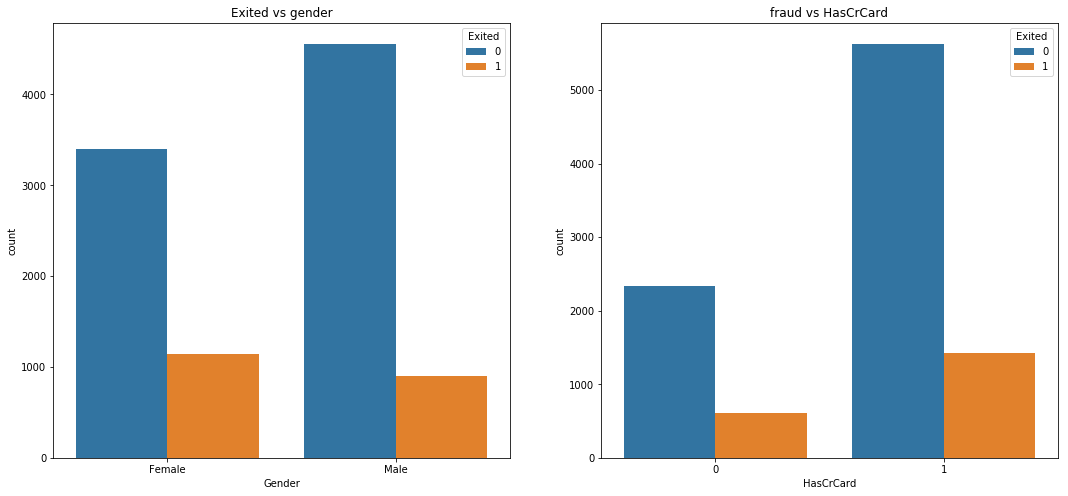

In [34]:
f,ax = plt.subplots(1,2,figsize = (18,8))
sns.countplot('Gender' , hue='Exited', data = df, ax = ax[0])
ax[0].set_title('Exited vs gender')
sns.countplot('HasCrCard', hue='Exited', data = df, ax = ax[1])
ax[1].set_title('fraud vs HasCrCard')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

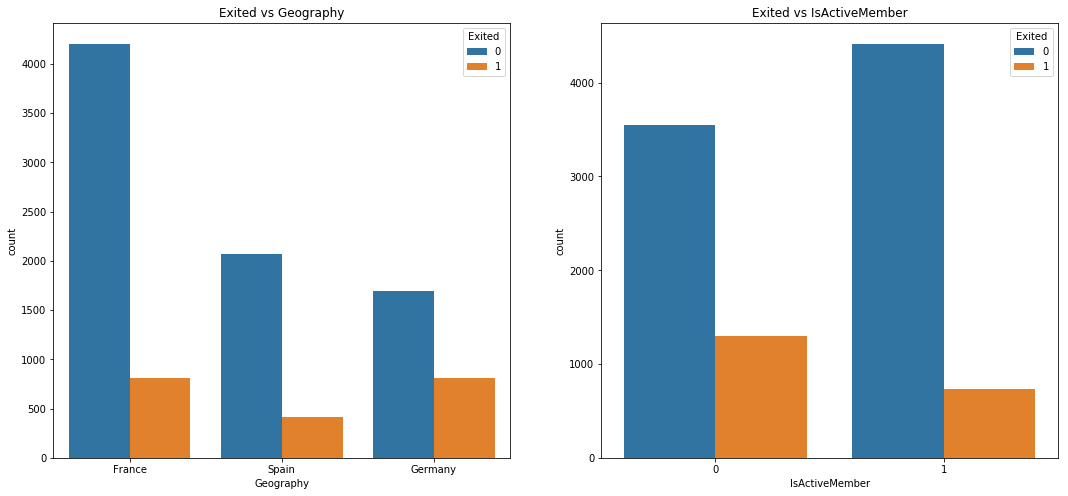

In [35]:
f,ax = plt.subplots(1,2,figsize = (18,8))
sns.countplot('Geography' , hue='Exited', data = df, ax = ax[0])
ax[0].set_title('Exited vs Geography')
sns.countplot('IsActiveMember', hue='Exited', data = df, ax = ax[1])
ax[1].set_title('Exited vs IsActiveMember')
plt.show

In [15]:
df_1 = pd.DataFrame()

In [19]:
df_1[['CreditScore', 'Age','Balance','EstimatedSalary']] = df[['CreditScore', 'Age','Balance','EstimatedSalary']]

In [20]:
df_1.head()

,CreditScore,Age,Balance,EstimatedSalary
0,619,42,0.00,101348.88
1,608,41,83807.86,112542.58
2,502,42,159660.80,113931.57
3,699,39,0.00,93826.63
4,850,43,125510.82,79084.10


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000231B741DEB8>,
      dtype=object)

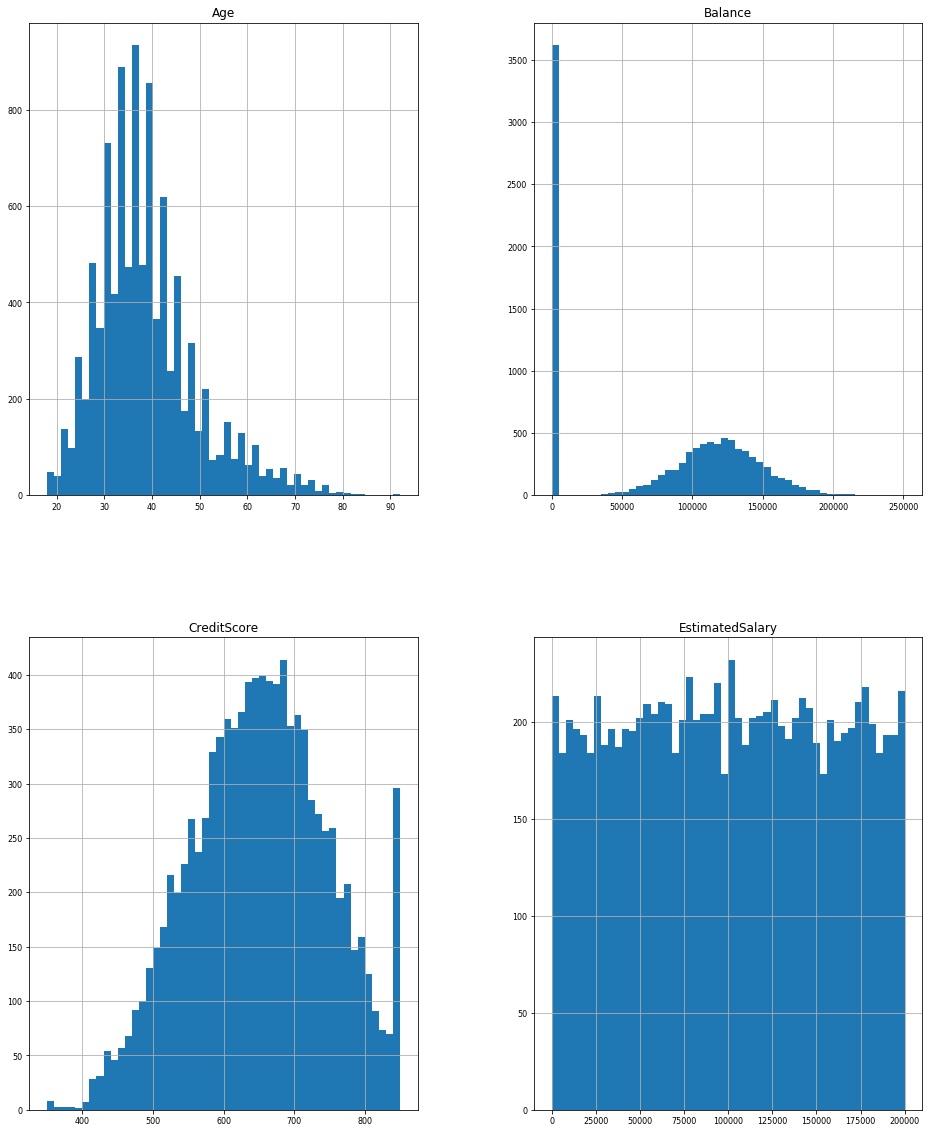

In [22]:
df_1.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

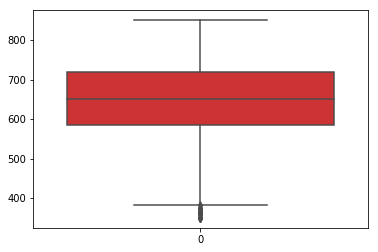

In [24]:
sns.boxplot(data = df_1.CreditScore, orient= 'V',palette = "Set1", linewidth = 1.5)

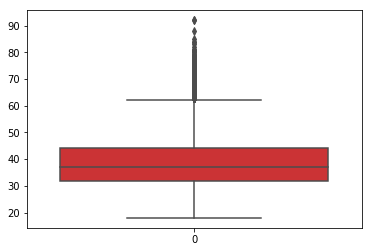

In [25]:
sns.boxplot(data = df_1.Age, orient= 'V',palette = "Set1", linewidth = 1.5)

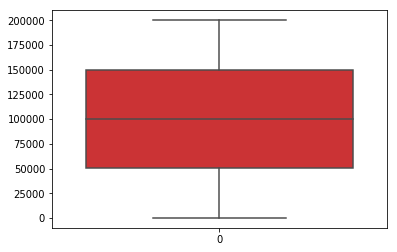

In [26]:
sns.boxplot(data = df_1.EstimatedSalary, orient= 'V',palette = "Set1", linewidth = 1.5)